In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [23]:
df = pd.read_csv (r'C:\Users\Eduardo\Exercises Machine Learning\FuelConsumptionCo2.csv')

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


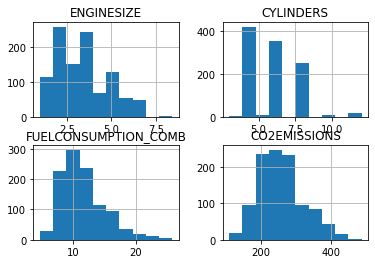

In [34]:
da = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

da.hist()
plt.show()

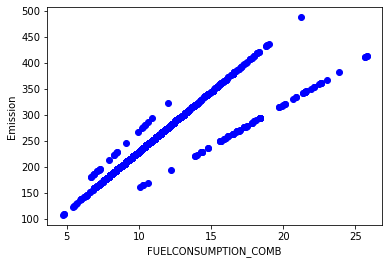

In [36]:
plt.scatter(da.FUELCONSUMPTION_COMB, da.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emission')
plt.show()

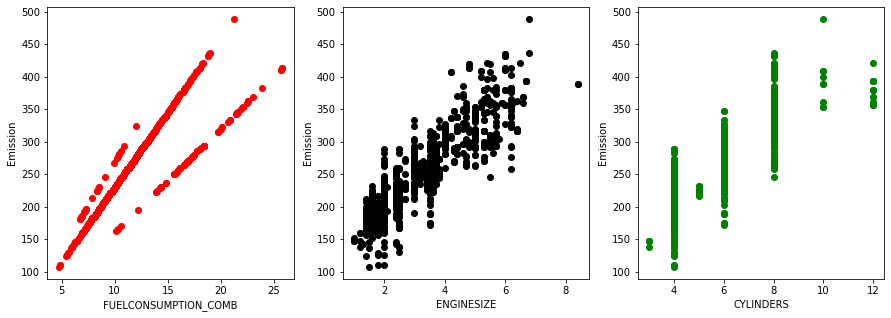

In [53]:
plt.figure(figsize = (15,5))

plt.subplot(131)
plt.scatter(da.FUELCONSUMPTION_COMB, da.CO2EMISSIONS, color='red')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emission')

plt.subplot(132)
plt.scatter(da.ENGINESIZE, da.CO2EMISSIONS, color = 'black')
plt.xlabel('ENGINESIZE')
plt.ylabel('Emission')

plt.subplot(133)
plt.scatter(da.CYLINDERS, da.CO2EMISSIONS, color = 'green')
plt.xlabel("CYLINDERS")
plt.ylabel('Emission')

plt.show()

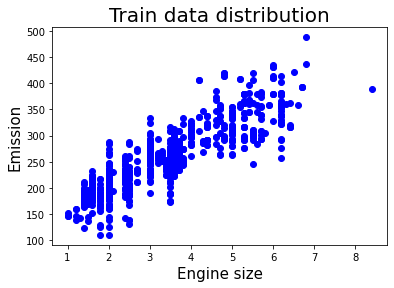

In [89]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(da, test_size=0.2)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine size",fontsize=15)
plt.ylabel("Emission", fontsize=15)
plt.title("Train data distribution", fontsize=20)
plt.show()

In [90]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
print('Coefficients--> ', regr.coef_)
print('Intercept--> ', regr.intercept_)

Coefficients-->  [[38.65527945]]
Intercept-->  [127.15498695]


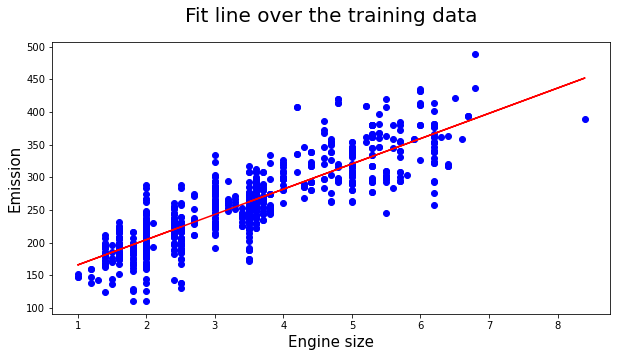

In [114]:
plt.figure(figsize = (10, 5))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine size', fontsize = 15)
plt.ylabel('Emission', fontsize=15)
plt.title('Fit line over the training data', fontsize=20,pad = 20, loc='center')
plt.show()

In [115]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 21.75
Residual sum of squares (MSE): 780.16
R2-score: 0.81
